In [31]:
%matplotlib inline
import numpy as np, math, random
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pdb

# Replication

In [2]:
#completed functions
def llplot(points):
    """
    function to plot outline of articulable vowel space, and current points 
    within it.  argument points is a list of points.
    """
    
    # LL have 2 axes, M1 (x: 350 <= M1 <= 850) and M2 (y), both in mel.
    # first plot the L&L outline
    x = np.arange(350,850,.01)
    y = [1150 + (1700 - 1150) * math.sqrt( (850-float(elt)) / (850-350) )
         for elt in x]
    plt.plot(x, y, 'k', linewidth=1.0) # 'k' means black
    y = [1150 + (800 - 1150) * math.sqrt( (850-float(elt)) / (850-350) )
         for elt in x]
    plt.plot(x, y, 'k', linewidth=1.0)
    plt.plot([350,350],[800,1700], 'k')
    plt.xlabel('M1 (mel)')
    plt.ylabel('M2 (mel)')
    plt.axis([300, 900, 750,1750])  # xrange, then yrange
    #plt.grid(True)
    
    # now plot points within the outline
    points_x = [xcoord for (xcoord,ycoord) in points]
    points_y = [ycoord for (xcoord,ycoord) in points]
    plt.plot(points_x, points_y, 'ro', markersize=10)

    # now display
    plt.show()


def create_ll_constraints(fpts):
    """
    create constraints for constrained optimization, for a set of x,y points
    represented in a flattened list.
    these hard-coded constraints define the L&L articulatory subspace.
    also return x,y bounds for these points.
    """
    numpts = len(fpts) / 2     # number of x,y pairs.
    cl = []    # constraint list
    for i in range(numpts):
        x_ix = 2*i
        y_ix = (2*i)+1
        x_lower = "lambda x: x[" +str(x_ix)+ "] - 350"   # x >= 350
        x_upper = "lambda x: 850 - x[" +str(x_ix)+ "]"   # x <= 850
        y_lower = "lambda x: y_lower_bound(x[" +str(x_ix)+"],x["+str(y_ix)+"])"
        y_upper = "lambda x: y_upper_bound(x[" +str(x_ix)+"],x["+str(y_ix)+"])"
#        print i, x_lower
#        print i, x_upper
#        print i, y_lower
#        print i, y_upper
#        print
        cl.append({'type': 'ineq', 'fun': eval(x_lower)})
        cl.append({'type': 'ineq', 'fun': eval(x_upper)})
        cl.append({'type': 'ineq', 'fun': eval(y_lower)})
        cl.append({'type': 'ineq', 'fun': eval(y_upper)})
    return tuple(cl)

In [12]:
def bound(x, M20):
    if (850 - x) < 0:
        x = 0
    return(1150 + (M20 - 1150) * math.sqrt( (850-x) / (850-350)))

def y_upper_bound(x,y):
    """
    L&L fn for y upper bound. 
    constraint satisified to the extent that returned value >= 0.
    """
    return(bound(x, 1700) - y)    

def y_lower_bound(x,y):
    """
    L&L fn for y lower bound. 
    constraint satisified to the extent that returned value >= 0.
    """
    return(y - bound(x, 800))


def energy (pts):
    """
    we are given a set of points.  the function computes the energy of these 
    points, i.e. non-dispersion, i.e. clusteredness, according to equation 2 
    on p. 842 of liljencrants and lindblom.
    """    
    #example pts: [(627, 1216), (510, 1180), (623, 1269)]
    x_s = [pt[0] for pt in pts] 
    y_s = [pt[1] for pt in pts]
    
    vals = []
    for i in range(1,len(pts)):
        for j in range (0,i):
            rSquared_ij = (x_s[i] - x_s[j])**2 + (y_s[i] - y_s[j])**2  
            vals.append(1.0/ float(rSquared_ij))
    return(sum(vals))

def f_energy (fpts):
    """
    a version of energy that takes a flattened list of pairs of x,y coords 
    as input.  for use with optimize.
    """
    non_flattened_points = zip(fpts[0::2], fpts[1::2])
    return energy(non_flattened_points)

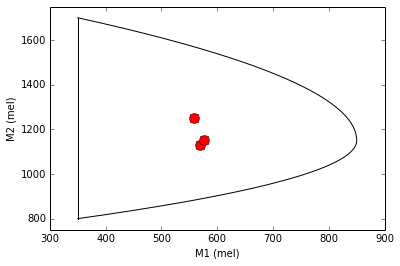

In [13]:
# define the center of the space, and a region around it to init pts in.
x_center = 600   # around the center of the x range
y_center = 1200  # around the center of the y range
x_half_range = 100   # defining the midrange size above and below x center
y_half_range = 100   # defining the midrange size above and below y center
x_range = range(x_center - x_half_range, x_center + x_half_range + 1)
y_range = range(y_center - y_half_range, y_center + y_half_range + 1)

# state how many points, and initialize them.
n = 3

# each point is represented as an (x,y) tuple.
points = []
for i in range(n):
    pt = (random.choice(x_range), random.choice(y_range))
    points.append(pt)

# plot initialized points.
llplot(points)

In [14]:
# flatten points into a 1-d list for optimization. One 6-tuple (3 2d points— x1, y1, x1, y2, x3, y3)
f_points = [item for pair in points for item in pair]

# now try to optimize energy, with x,y bounds and constraints.
# create bounds and constraints.
cc = create_ll_constraints(f_points)
cc

({'fun': <function __main__.<lambda>>, 'type': 'ineq'},
 {'fun': <function __main__.<lambda>>, 'type': 'ineq'},
 {'fun': <function __main__.<lambda>>, 'type': 'ineq'},
 {'fun': <function __main__.<lambda>>, 'type': 'ineq'},
 {'fun': <function __main__.<lambda>>, 'type': 'ineq'},
 {'fun': <function __main__.<lambda>>, 'type': 'ineq'},
 {'fun': <function __main__.<lambda>>, 'type': 'ineq'},
 {'fun': <function __main__.<lambda>>, 'type': 'ineq'},
 {'fun': <function __main__.<lambda>>, 'type': 'ineq'},
 {'fun': <function __main__.<lambda>>, 'type': 'ineq'},
 {'fun': <function __main__.<lambda>>, 'type': 'ineq'},
 {'fun': <function __main__.<lambda>>, 'type': 'ineq'})

In [15]:
###### now optimize.
# need to be careful with settings of:
# tol: acceptable tolerance
# maxiter: max number of iterations.
print "energy before minimization", f_energy(f_points)
res = minimize(f_energy, f_points, constraints=cc, method='SLSQP', 
               options={'disp': True, 'iprint': 2, 'maxiter': 5000}, tol = 1.0E-100)
print "energy after minimization", res.fun


energy before minimization 0.00215056745384
  NIT    FC           OBJFUN            GNORM
    1     8     2.150567E-03     2.488011E-04
    2    16     2.150506E-03     2.487893E-04
    3    24     2.150196E-03     2.487308E-04
    4    32     2.148650E-03     2.484384E-04
    5    40     2.140958E-03     2.469852E-04
    6    48     2.103380E-03     2.399265E-04
    7    56     1.935358E-03     2.092037E-04
    8    64     1.409742E-03     1.225940E-04
    9    72     9.928925E-04     6.555311E-05
   10    80     7.334818E-04     3.629859E-05
   11    88     5.594242E-04     1.994751E-05
   12    96     4.501768E-04     1.149091E-05
   13   104     3.854668E-04     7.818103E-06
   14   112     3.527870E-04     7.175990E-06
   15   120     3.406295E-04     7.776793E-06
   16   128     3.380158E-04     8.390855E-06
   17   136     3.377841E-04     8.643921E-06
   18   144     3.377790E-04     8.686846E-06
   19   152     3.377789E-04     8.689262E-06
   20   160     3.377785E-04     8.6

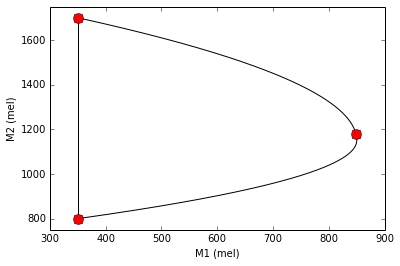

In [16]:
new_points = zip(res.x[0::2], res.x[1::2])
llplot(new_points)

# Extension

In [25]:
def rsq(pt1,pt2):
    """
    we are given two points.  the function computes and returns r-squared, 
    or the distance squared, between these two points.
    """
    
    rsquared = ((pt1[0]-pt2[0])**2 +       # x coords
                (pt1[1]-pt2[1])**2)        # y coords
    return rsquared

def nose_weight(pt):
    """
    given pt = (x,y), return the weight associated with that point.  
    weight is a gaussian fn of distance from the "nose" of the space,
    at (850,1150).
    alpha controls width
    """
    nose = (850,1150)
    alpha = .000005  # tweaked 
    distsq = rsq(pt,nose)
    return math.exp(-alpha * distsq)


def weighted_energy (pts):
    """
    energy but weighted by similarity to nose of L&L region.    
    """
    x_s = [pt[0] for pt in pts] 
    y_s = [pt[1] for pt in pts]
    
    vals = []
    weights = [] 
    for i in range(1,len(pts)):
        for j in range (0,i):
            rSquared_ij = (x_s[i] - x_s[j])**2 + (y_s[i] - y_s[j])**2  
            vals.append(1.0/ float(rSquared_ij))
            weights.append( nose_weight((x_s[i], y_s[i])) + nose_weight((x_s[j], y_s[j])))
    return(np.sum(np.array(vals) * np.array(weights)))



def f_weighted_energy (fpts):
    """
    like f_energy but with weights.
    """
    non_flattened_points = zip(fpts[0::2], fpts[1::2])
    return weighted_energy(non_flattened_points)

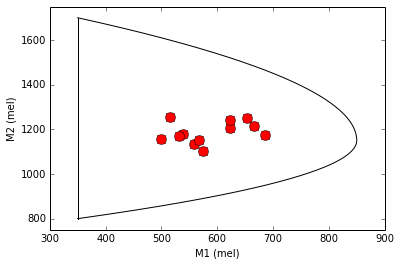

In [29]:
# define the center of the space, and a region around it to init pts in.
x_center = 600   # around the center of the x range
y_center = 1200  # around the center of the y range
x_half_range = 100   # defining the midrange size above and below x center
y_half_range = 100   # defining the midrange size above and below y center
x_range = range(x_center - x_half_range, x_center + x_half_range + 1)
y_range = range(y_center - y_half_range, y_center + y_half_range + 1)

# state how many points, and initialize them.
n = 12

# each point is represented as an (x,y) tuple.
points = []
for i in range(n):
    pt = (random.choice(x_range), random.choice(y_range))
    points.append(pt)

# plot that point and the contour.
llplot(points)

# flatten points into a 1-d list for optimization.
f_points = [item for pair in points for item in pair]

# now try to optimize energy, with x,y bounds and constraints.
# create bounds and constraints.
cc = create_ll_constraints(f_points)

energy before minimization 0.0306468093947
energy after minimization 0.000393198426614


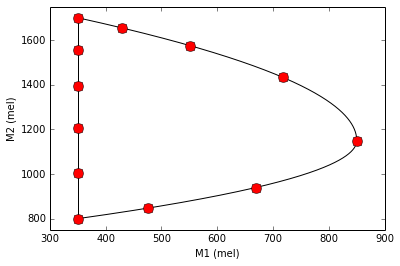

In [30]:
# now optimize.
# need to be careful with settings of:
# tol: acceptable tolerance
# maxiter: max number of iterations.
print "energy before minimization", f_energy(f_points)
res = minimize(f_weighted_energy, f_points, constraints=cc, method='SLSQP', 
               options={'disp': True, 'iprint': 0, 'maxiter': 5000}, tol = 1.0E-16)
print "energy after minimization", res.fun
new_points = zip(res.x[0::2], res.x[1::2])
llplot(new_points)